We implement VGG net from the original [paper](https://arxiv.org/abs/1409.1556)

### Dataset
The goal is to train VGG on a subset of ImageNet ([ImageNet-100](https://www.kaggle.com/datasets/ambityga/imagenet100)). Images have high resolution and for our training, we used 224x224 images.

VGG model is a deep one using primarily very small 3x3 kernel convolutions and manages to achieve state of tha art at its time. Deeper nets with small filters had outperformed shallow ones with laeger filters.

The paper proposed 5 convolutional networks configurations. We choosed to implement the deeper ones: VGG16 (16 weight layers) and VGG19 (19 weight layers) which uses only 3x3 convolutional layers.

<p align="center">
  <img src="vgg-model.png" alt="VGG" width="70%">
</p>

In [1]:
import numpy as np

import dataset

In [2]:
batch_size = 32

data = dataset.ImageNet100(batch_size=batch_size, normalize=False)
num_classes = data.num_classes

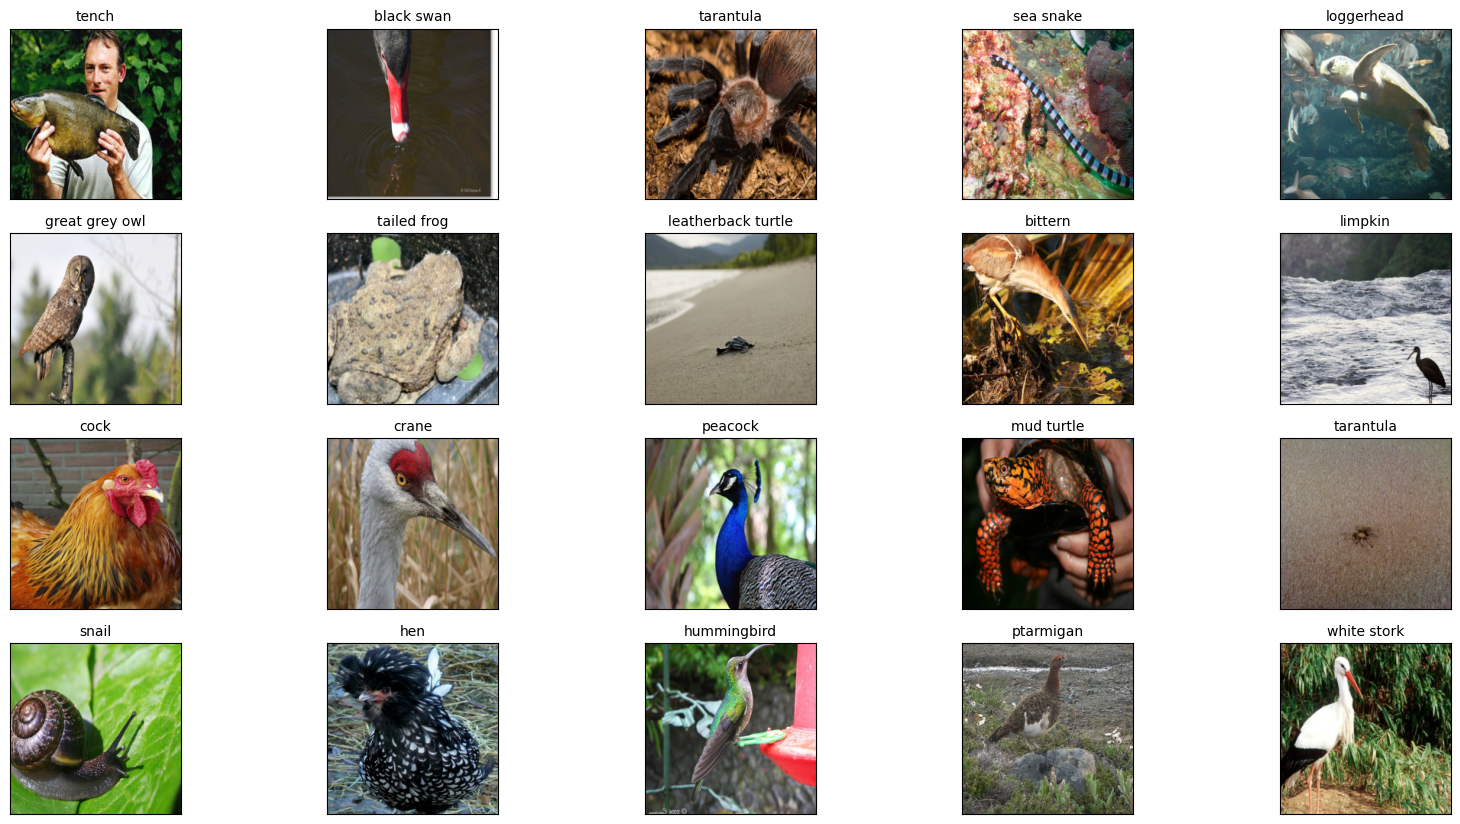

torch.Size([32, 3, 224, 224])


In [3]:
for batch in data.train_dataloader:
    x, y = batch
    labels = [data.labels_idx2str[yi] for yi in y.numpy()]
    data.show_images(x.permute(0,2,3,1)[:20], labels)
    print(x.shape); break

In [4]:
for v in data.labels.values():
    print(v[0])

chambered nautilus, pearly nautilus, nautilus
harvestman, daddy longlegs, Phalangium opilio
macaw
bittern
electric ray, crampfish, numbfish, torpedo
drake
agama
night snake, Hypsiglena torquata
indigo bunting, indigo finch, indigo bird, Passerina cyanea
tiger shark, Galeocerdo cuvieri
flamingo
garter snake, grass snake
common newt, Triturus vulgaris
tench, Tinca tinca
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
white stork, Ciconia ciconia
terrapin
diamondback, diamondback rattlesnake, Crotalus adamanteus
flatworm, platyhelminth
sea snake
spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish
green snake, grass snake
bald eagle, American eagle, Haliaeetus leucocephalus
kite
goldfish, Carassius auratus
scorpion
goose
bulbul
chickadee
sea anemone, anemone
magpie
mud turtle
crayfish, crawfish, crawdad, crawdaddy
lorikeet
garden spider, Aranea diademata
spoonbill
hermit crab
great white shark, white shark, man-eater, man-eating shark, Carcharodon carchari

### Model

In [5]:
import model

In [9]:
vgg16 = model.VGGNet(num_classes=num_classes, arch="vgg16")
vgg16

VGGNet(
  (0): VGGBlock(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): VGGBlock(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): VGGBlock(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, st

This paper is like an extension of AlexNet paper but this time using block layers. Small 3x3 convolutional layers were used. So it was possible to used deeper models.

In [10]:
vgg16[0]

VGGBlock(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [12]:
vgg19 = model.VGGNet(num_classes=num_classes, arch="vgg19")
vgg19

VGGNet(
  (0): VGGBlock(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): VGGBlock(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): VGGBlock(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_siz

In [19]:
def compute_number_params(model):
    num_total_params = 0
    for _, params in model.named_parameters():
        if params.requires_grad:
            num_total_params += params.numel()
    return num_total_params

In [21]:
for m in [vgg16, vgg19]:
    num_params = compute_number_params(m)
    print(f"{m.arch_name.upper()}: {num_params} parameters")

VGG16: 134657728 parameters
VGG19: 139966144 parameters


In comparison, AlexNet had 58,690,564 parameters.

### Activation
ReLU is also used here.

$ReLU(x)=\max(x,0)$ is a saturating nonlinearity activation function and fast to compute. Plus the Sigmoid was prone to vanishing gradients.

### Architecture

The convolutional layers in each block are followed by max-pooling. Local response normalization was not used for VGG as it is said it does not improve performance. ReLU activations et Dropout are used as in AlexNet paper to fight againts overfitting and forces the network to learn more robust features.

Each learnable weight of the network is initialized with zero-mean Gaussian distribution with standard deviation of $0.01$. The initial biases are $0$.

For our training we used Glorot initialization which were published after paper submission.

### Training

Data augmentation was used. We used the first form presented in the Alexnet paper. As the ImageNet-100 dataset have not fixed-size images, we reshaped the images to 2X6x256 and made random extraction of 224x224 patches. To finish, we enable a random horitontal flip of 0.5 probability.

For the training, the setup is:
- Optimizer: SGD + momentum of $0.9$
- Learning rate is initializd at $0.01$ and divided by $10$ when the valdiation loss stop improving. Weight decay of $0.0005$ is applied for regularization
- Loss: CrossEntropy
- Epochs: 74
- Batch size: 32 (due to hardware limitations on my computer) 

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
def get_metrics(name):
    print(f"Model {name}")
    for set_name in ["train", "eval"]:
        for metric in ["loss", "accuracy"]:
            img = Image.open(f"{name}-{set_name}-{metric}.png")
            plt.imshow(img, cmap="gray")
            plt.axis("off")
            plt.show()

Model vgg16


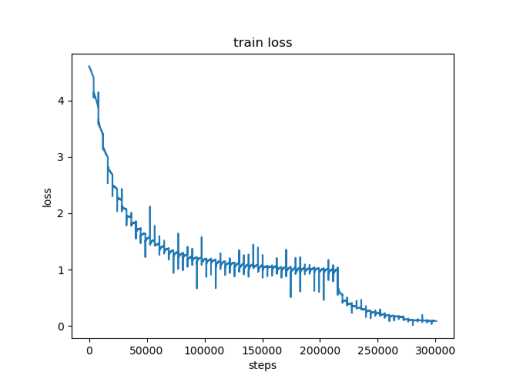

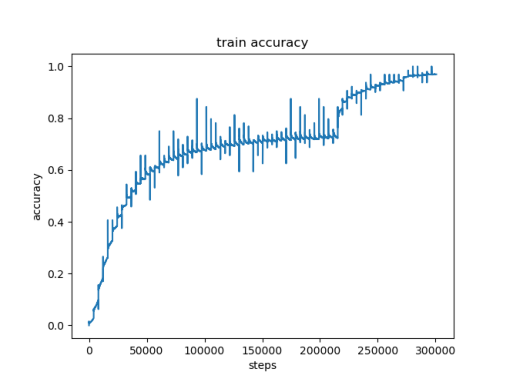

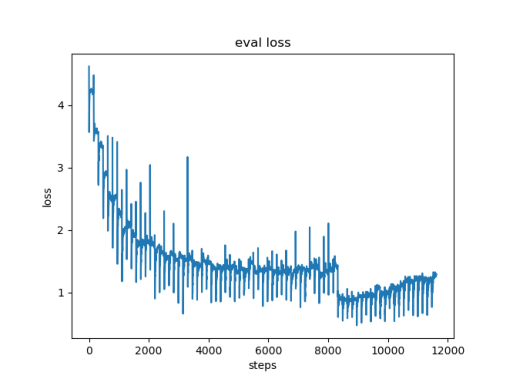

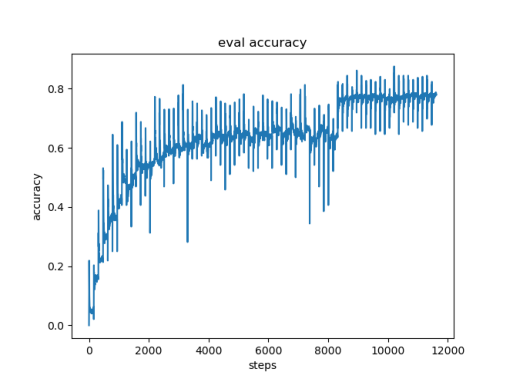

In [24]:
get_metrics("vgg16")

Model vgg19


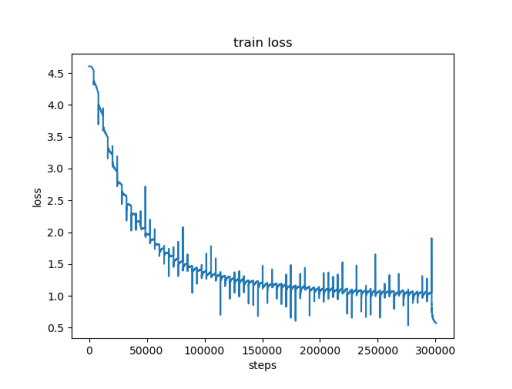

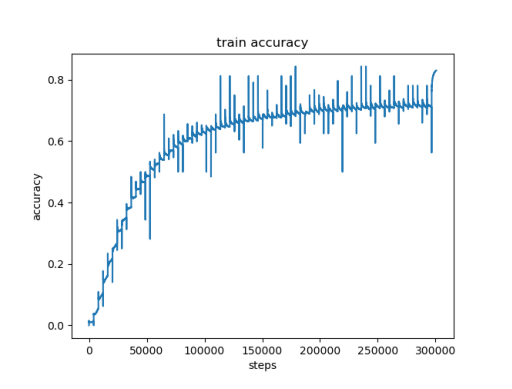

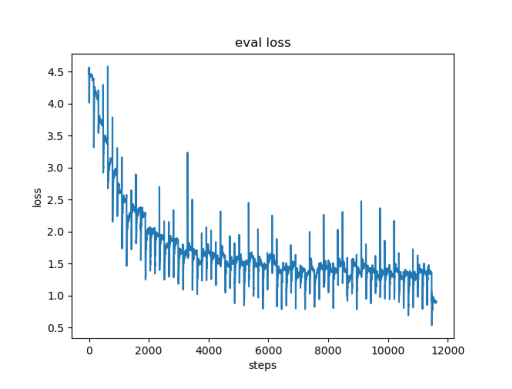

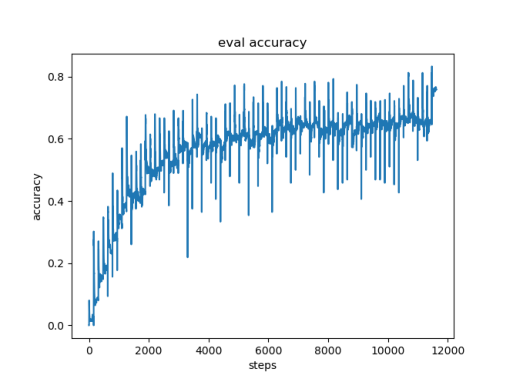

In [50]:
get_metrics("vgg19")

In [25]:
!cat training-vgg16.log | tail

2025-05-25 09:52:04 [INFO] [Epoch 73/74] [Step 295536] train_loss: 0.09216, train_acc: 0.96851
2025-05-25 09:59:05 [INFO] [Epoch 73/74] [Step 296536] train_loss: 0.09303, train_acc: 0.96807
2025-05-25 09:59:51 [INFO] [Epoch 73/74] train_loss: 0.09311, train_acc: 0.96812, eval_loss: 1.23740, eval_acc: 0.77680
2025-05-25 09:59:52 [INFO] [Epoch 74/74] [Step 296599] train_loss: 0.03505, train_acc: 1.00000
2025-05-25 10:06:54 [INFO] [Epoch 74/74] [Step 297599] train_loss: 0.09070, train_acc: 0.96794
2025-05-25 10:13:54 [INFO] [Epoch 74/74] [Step 298599] train_loss: 0.08969, train_acc: 0.96878
2025-05-25 10:20:55 [INFO] [Epoch 74/74] [Step 299599] train_loss: 0.08836, train_acc: 0.96915
2025-05-25 10:27:57 [INFO] [Epoch 74/74] [Step 300599] train_loss: 0.08788, train_acc: 0.96912
2025-05-25 10:28:43 [INFO] [Epoch 74/74] train_loss: 0.08772, train_acc: 0.96918, eval_loss: 1.29291, eval_acc: 0.77860
2025-05-25 10:28:44 [INFO] Model saved at vgg16.pth


In [26]:
!cat training-vgg19.log | tail

2025-05-27 15:51:20 [INFO] [Epoch 73/74] [Step 295536] train_loss: 1.05039, train_acc: 0.71332
2025-05-27 15:59:40 [INFO] [Epoch 73/74] [Step 296536] train_loss: 1.05885, train_acc: 0.71120
2025-05-27 16:00:36 [INFO] [Epoch 73/74] train_loss: 1.06007, train_acc: 0.71065, eval_loss: 1.35741, eval_acc: 0.65220
2025-05-27 16:00:37 [INFO] [Epoch 74/74] [Step 296599] train_loss: 1.90749, train_acc: 0.56250
2025-05-27 16:09:10 [INFO] [Epoch 74/74] [Step 297599] train_loss: 0.65559, train_acc: 0.80866
2025-05-27 16:18:01 [INFO] [Epoch 74/74] [Step 298599] train_loss: 0.61127, train_acc: 0.82045
2025-05-27 16:26:27 [INFO] [Epoch 74/74] [Step 299599] train_loss: 0.58694, train_acc: 0.82662
2025-05-27 16:34:53 [INFO] [Epoch 74/74] [Step 300599] train_loss: 0.57260, train_acc: 0.83043
2025-05-27 16:35:49 [INFO] [Epoch 74/74] train_loss: 0.57115, train_acc: 0.83075, eval_loss: 0.90557, eval_acc: 0.75800
2025-05-27 16:35:51 [INFO] Model saved at vgg19.pth


We used only accuracy as metrics because the dataset is balanced. We can see voth our model overfitted on the training set. Here again second form of data augmentation which consists in altering the intensities of the RGB channels in training images may have helped.

The train-eval accuracy gap of VGG19 (~7%) is much slower than VGG16's (~19%). This suggest better generalization. We may have extended training to more epochs and see if we achieve better generalization on both model and tune also regularization.

Plus further training is necessary for VGG19 as it is able to have better training accuracy.

In [27]:
import torch
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import dataset

We propose the confusion matrix on the validation dataset used during training.

In [28]:
batch_size = 32
data = dataset.ImageNet100(batch_size=batch_size)
num_classes = data.num_classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
vgg16.load_state_dict(torch.load("vgg16.pth"))
vgg16.to(device)
vgg16.eval()

/tmp/ipykernel_17160/3281605610.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg16.load_state_dict(torch.load("vgg16.pth"))


VGGNet(
  (0): VGGBlock(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): VGGBlock(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): VGGBlock(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, st

In [30]:
vgg19.load_state_dict(torch.load("vgg19.pth"))
vgg19.to(device)
vgg19.eval()

/tmp/ipykernel_17160/2812385637.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg19.load_state_dict(torch.load("vgg19.pth"))


VGGNet(
  (0): VGGBlock(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): VGGBlock(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): VGGBlock(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_siz

In [32]:
def get_eval_confusion_matrix(model, eval_dataloader):
    all_preds = []
    all_true = []
    for batch in eval_dataloader:
        batch = [a.to(device) for a in batch]
        with torch.no_grad():
            output = model(*batch[:-1])
            pred = output.argmax(dim=-1).detach().cpu().numpy()
            all_preds.append(pred)
            all_true.append(batch[-1].detach().cpu().numpy())

    return confusion_matrix(y_true=np.concatenate(all_true), y_pred=np.concatenate(all_preds))

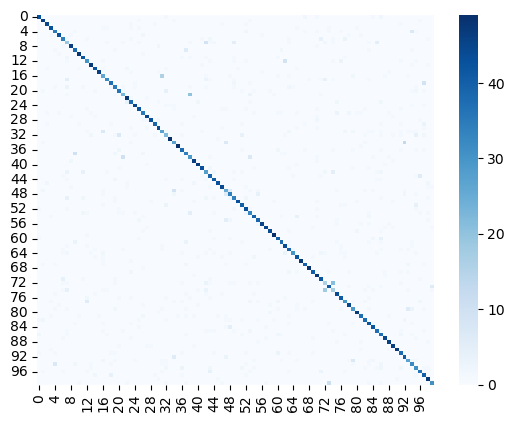

In [33]:
vgg16_eval_cm = get_eval_confusion_matrix(vgg16, data.eval_dataloader)
sns.heatmap(vgg16_eval_cm, cmap="Blues"); plt.show()

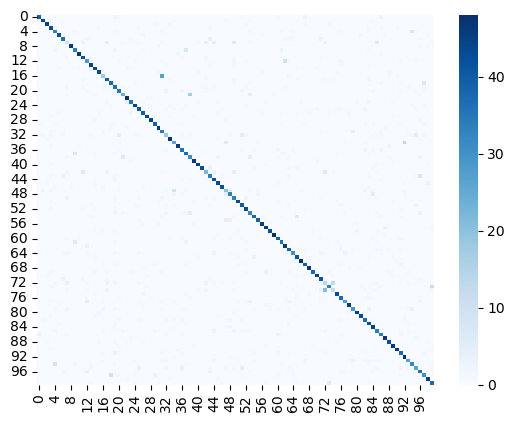

In [34]:
vgg19_eval_cm = get_eval_confusion_matrix(vgg19, data.eval_dataloader)
sns.heatmap(vgg19_eval_cm, cmap="Blues"); plt.show()

In [35]:
import os

In [36]:
test_set = [np.array(Image.open(path).convert("RGB")) for path in os.scandir("/home/malick/datasets/imagenet-100/test-set")]

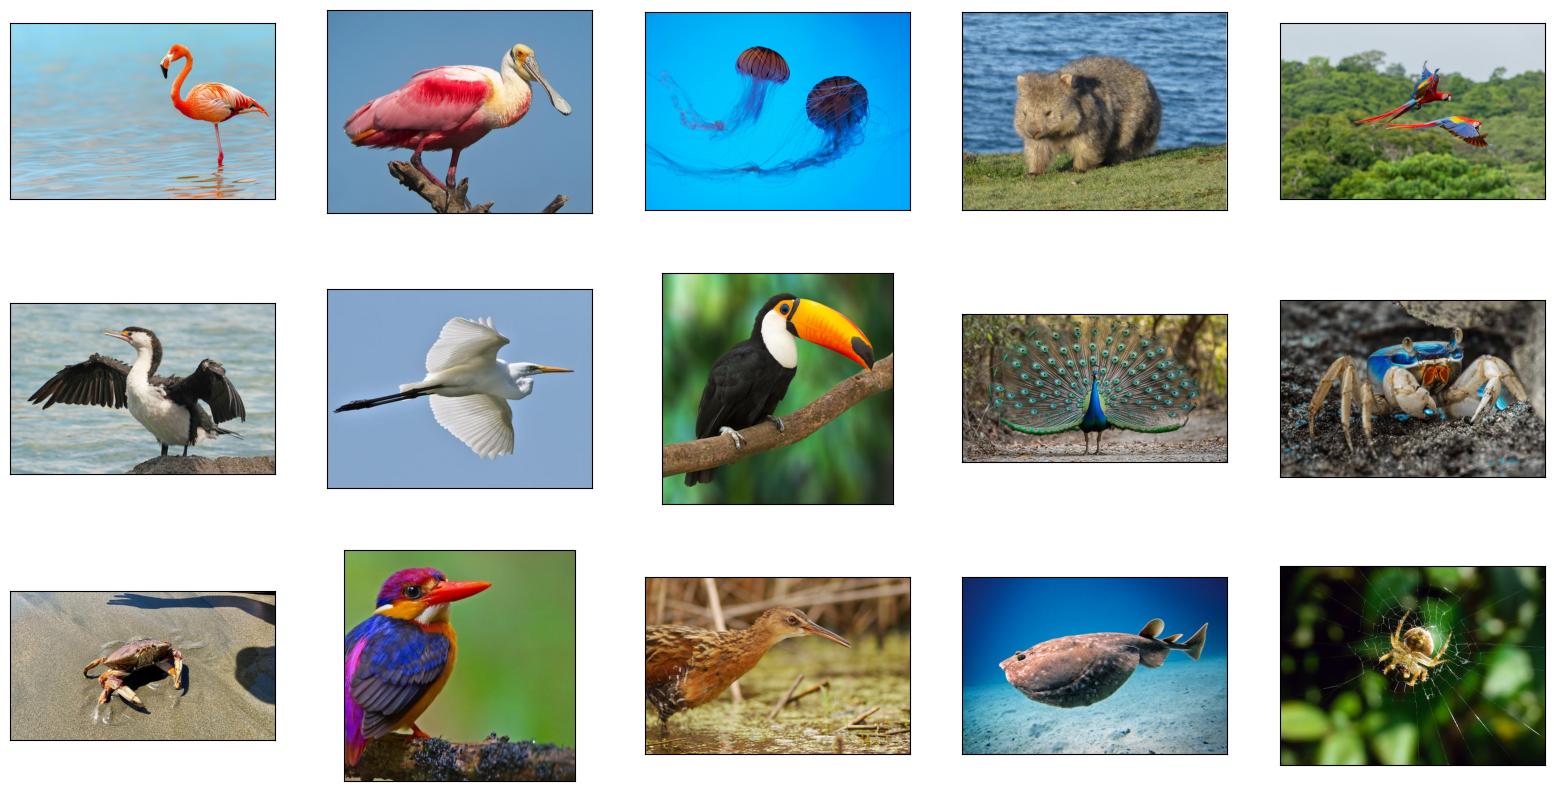

In [37]:
fig, axes = plt.subplots(3, 5, figsize=(19.8,10.2))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(test_set[i], cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

In [38]:
import inference

In [40]:
def get_preds(model):
    preds = []
    for im in test_set:
        pred = inference.predict(model, torch.tensor(im, dtype=torch.float32).permute(2,0,1) / 255., device=device)
        preds.append(pred)
    return preds

In [41]:
vgg16_preds = get_preds(vgg16)
vgg19_preds = get_preds(vgg19)

In [42]:
def visualize_preds(preds):
    labels = [data.labels_idx2str[p[0]] for p in preds]

    fig, axes = plt.subplots(3, 5, figsize=(19.8,10.2))
    axes = axes.ravel()
    for i in range(len(axes)):
        axes[i].imshow(test_set[i], cmap="gray")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(labels[i], fontsize=10)
    plt.show()

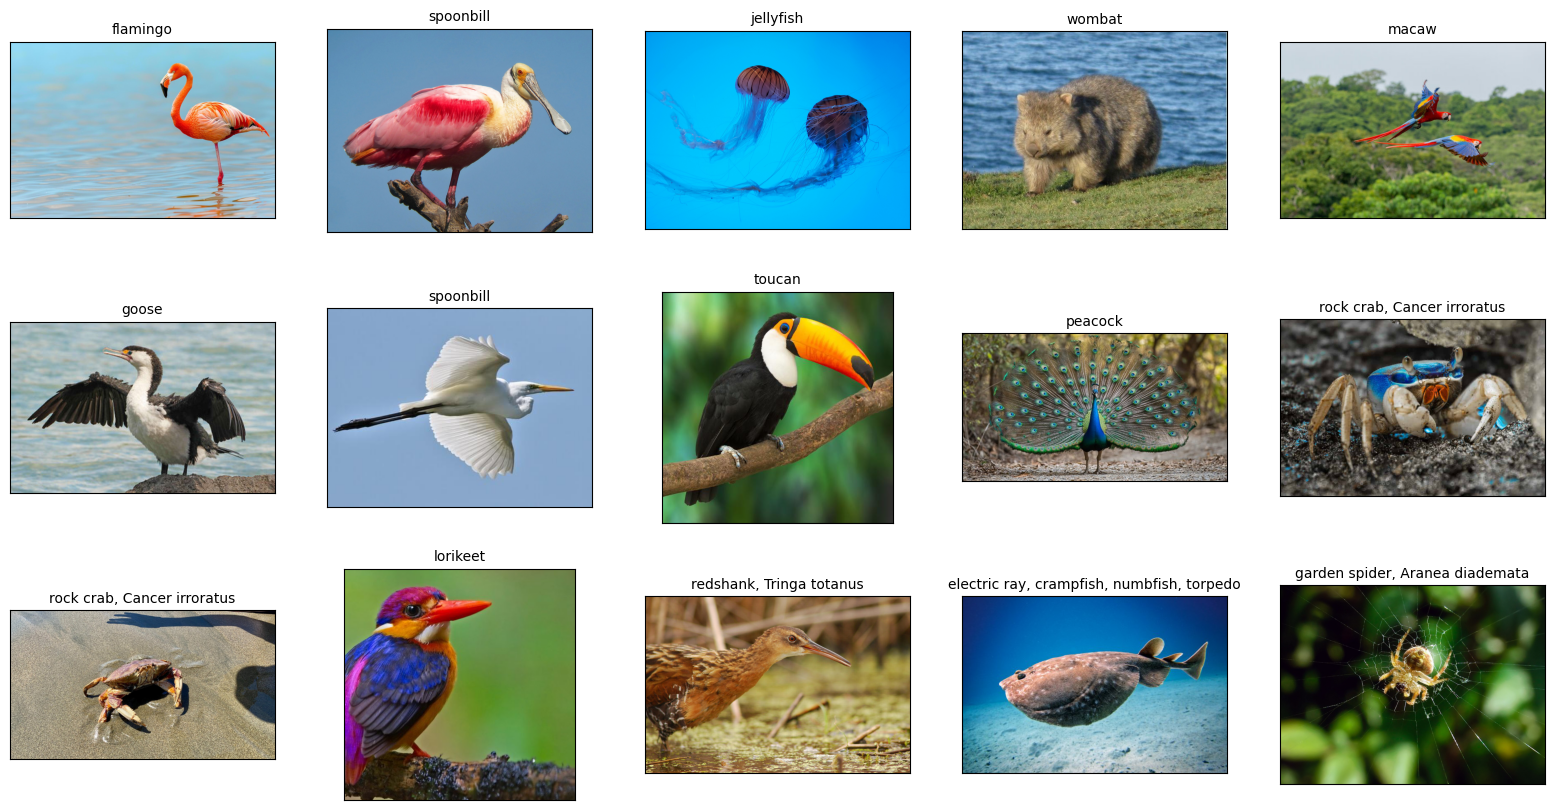

In [44]:
visualize_preds(vgg16_preds)

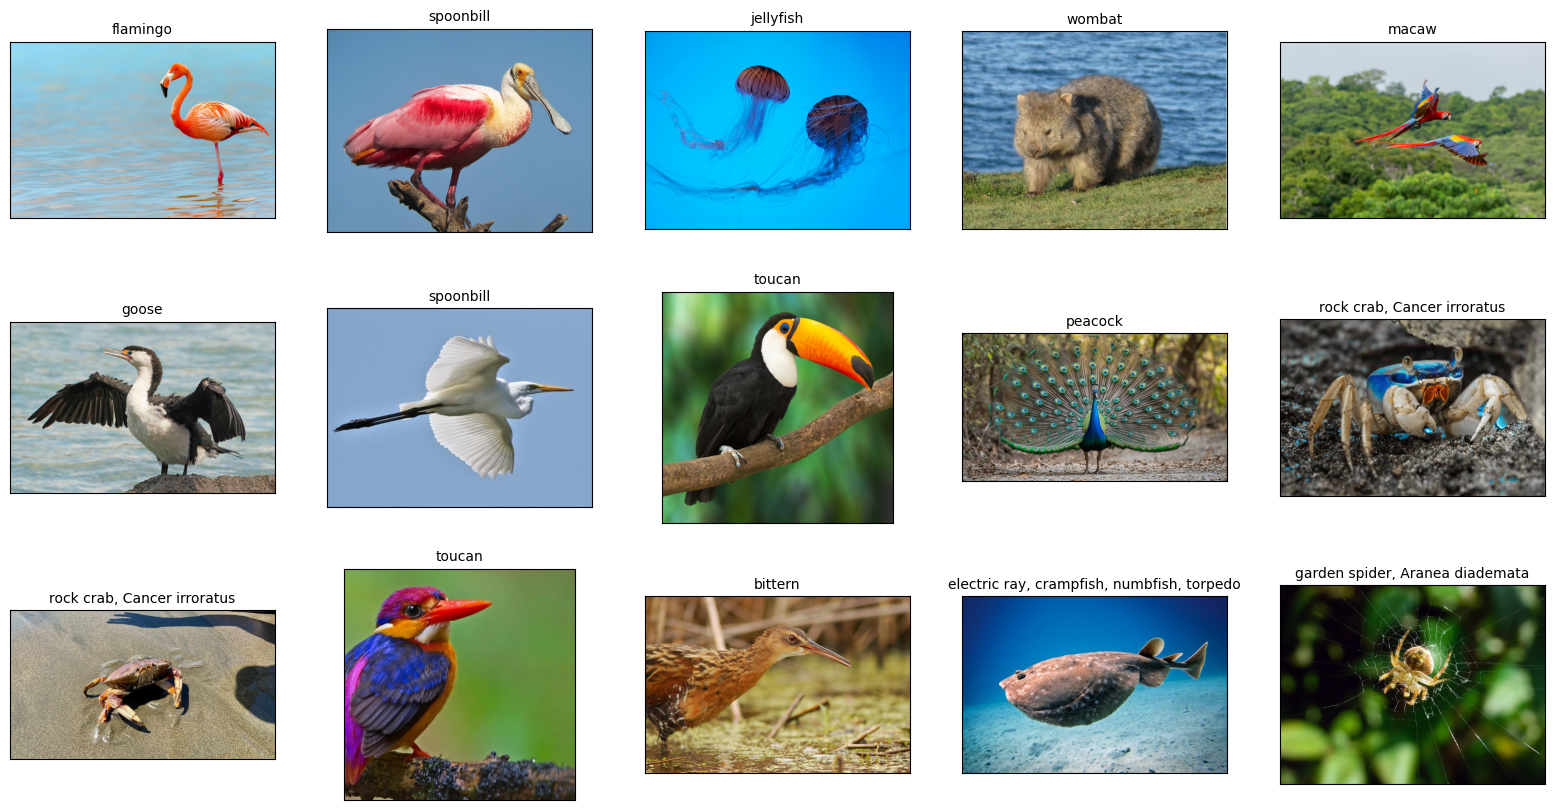

In [45]:
visualize_preds(vgg19_preds)

The two models differ in prediction for 13th image.

In [50]:
def visualize_other_labels_predicted(preds):
    other_plosible_preds = [4, 5, 6, 9, 10, 11, 12, 13] # choosed in purpose of having other possible labels

    fig, axes = plt.subplots(4, 4, figsize=(19.8,10.2))
    for idx, i in enumerate(other_plosible_preds):
        pred = preds[i]
        axes[idx//4*2, idx%4].imshow(test_set[i], cmap="gray")

        top3 = np.argsort(pred[1])[-3:]
        top3 = [(data.labels_idx2str[i], pred[1][i]) for i in top3]
        labels = [x[0] for x in top3]
        values = [x[1] for x in top3]
        axes[idx//4*2+1, idx%4].barh(labels, values, height=0.15, color='steelblue')
        for i, (value, label) in enumerate(zip(values, labels)):
            axes[idx//4*2+1, idx%4].text(0, i, label.split(",")[0] + ": " + str(value)[:5], 
                    color='red', va='center', ha="left", fontsize=10, weight='bold')
        axes[idx//4*2+1, idx%4].set_xticks([])
        axes[idx//4*2+1, idx%4].set_yticks([])
        axes[idx//4*2, idx%4].set_xticks([])
        axes[idx//4*2, idx%4].set_yticks([])
    plt.show()

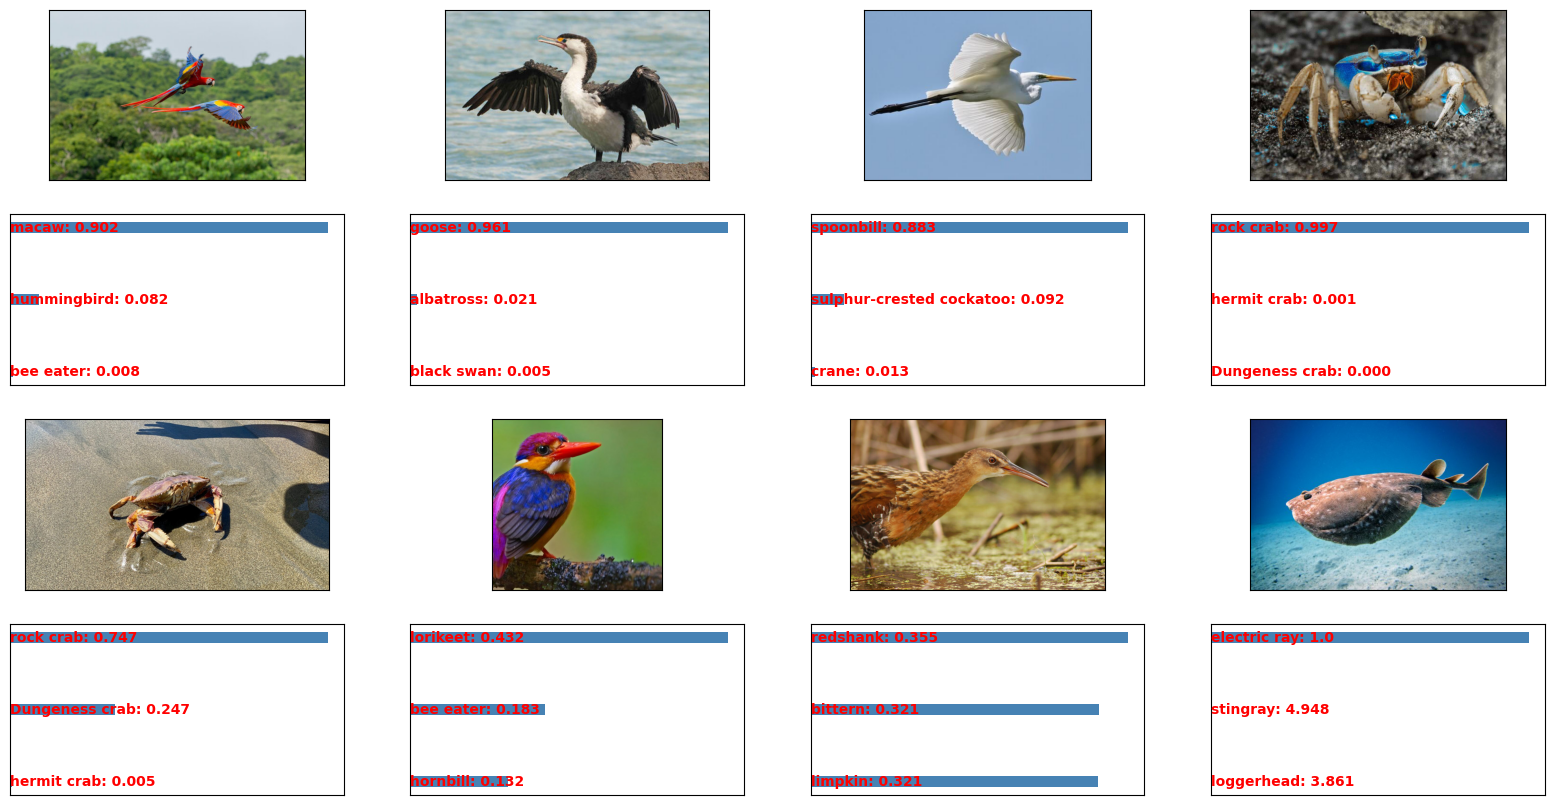

In [51]:
visualize_other_labels_predicted(vgg16_preds)

For the image we outlined recently, the VGG16 predicted bittern and limpkin in the top predicted labels with very closed probabilities. 

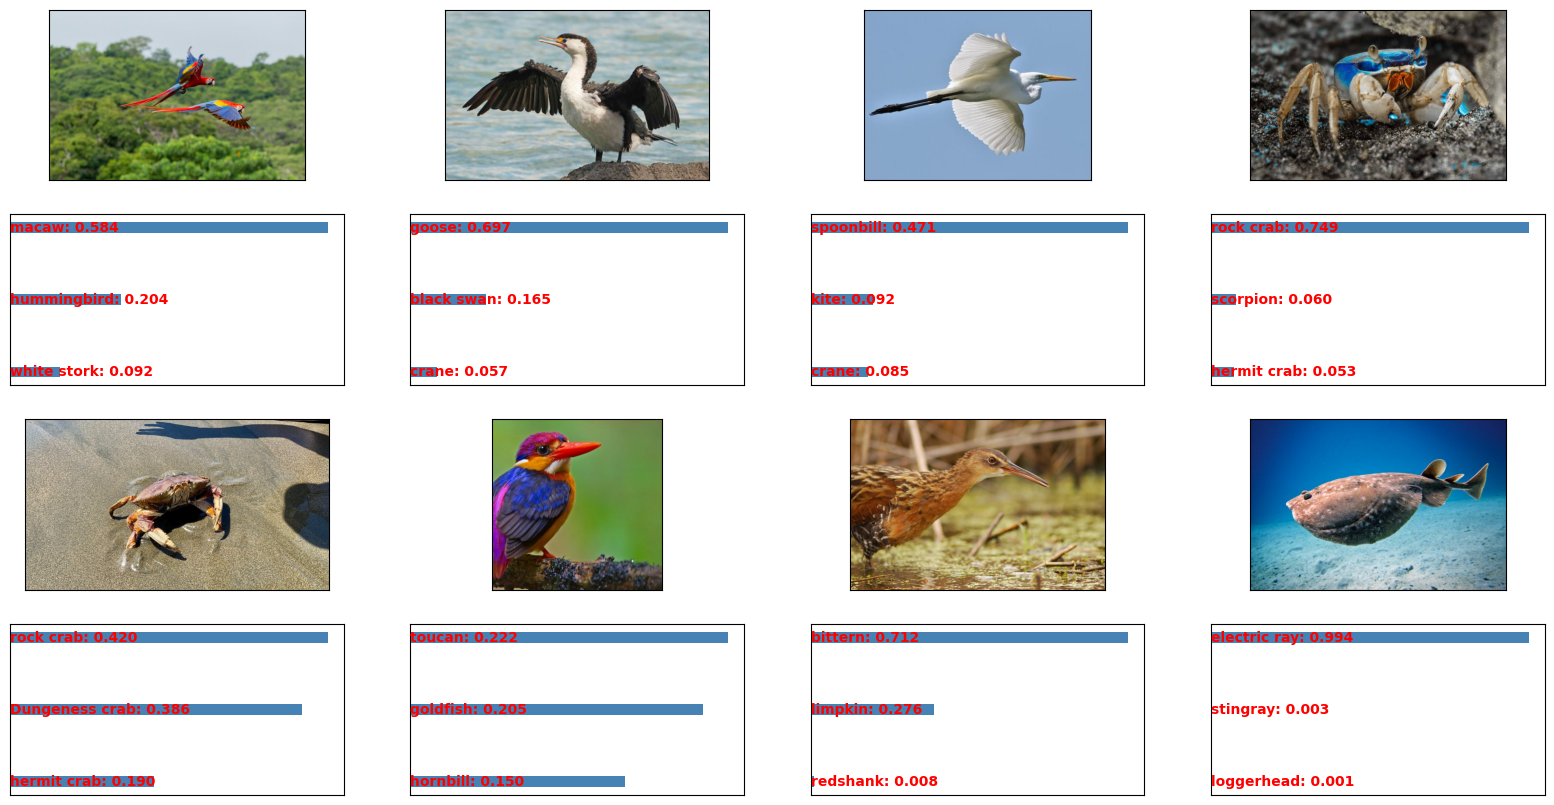

In [52]:
visualize_other_labels_predicted(vgg19_preds)

Unlikely, VGG19 is more confident predicting "bittern" for the 13th image.

We can notice that both model failed to predict the "Dungeness crab" and confused it with "rock crab" but VGG16 gave a higher probability to "Dungeness crab" than VGG16.

### Topk error

In [53]:
def compute_top_k_error(model, eval_dataloader, k: int=5):
    topk_acc = 0
    num_instances = 0
    for batch in eval_dataloader:
        batch = [a.to(device) for a in batch]
        with torch.no_grad():
            output = model(*batch[:-1])
            _, pred = output.topk(k, dim=1)
            topk_acc += (pred==batch[-1].view(-1, 1).expand_as(pred)).any(dim=-1).float().sum().item()
            num_instances += batch[-1].size(0)
    topk_acc /= num_instances
    return topk_acc, 1-topk_acc

In [54]:
for k in range(1, 6, 2):
    topk_acc, topk_error = compute_top_k_error(model=vgg16, eval_dataloader=data.eval_dataloader, k=k)
    print(f"VGG16: top{k}_accuracy: {topk_acc:.5f}, top{k}_error: {topk_error:.5f}")

VGG16: top1_accuracy: 0.77700, top1_error: 0.22300
VGG16: top3_accuracy: 0.90640, top3_error: 0.09360
VGG16: top5_accuracy: 0.93700, top5_error: 0.06300


In [55]:
for k in range(1, 6, 2):
    topk_acc, topk_error = compute_top_k_error(model=vgg19, eval_dataloader=data.eval_dataloader, k=k)
    print(f"VGG19: top{k}_accuracy: {topk_acc:.5f}, top{k}_error: {topk_error:.5f}")

VGG19: top1_accuracy: 0.76240, top1_error: 0.23760
VGG19: top3_accuracy: 0.89420, top3_error: 0.10580
VGG19: top5_accuracy: 0.93060, top5_error: 0.06940


TopK errors are similar. Even if VGG16's topk errors are lower, it overfits more than VGG19. A further training of VGG19 should outperform it.  